<a href="https://colab.research.google.com/github/Raziel-JKM/Practice/blob/main/ai/EX03/Mustache%20v1.1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

스티커앱에서 생각해볼 수 있는 문제점

- 얼굴 각도에 따라 스티커가 어떻게 변해야할까요?
- 멀리서 촬영하면 왜 안될까요? 옆으로 누워서 촬영하면 왜 안될까요?
- 실행 속도가 중요할까요?
- 스티커앱을 만들 때 정확도가 얼마나 중요할까요?

In [5]:
pip install opencv-python

In [6]:
pip install cmake

In [7]:
pip install dlib

In [4]:
# 모듈 불러오기

import cv2
import matplotlib.pyplot as plt
import numpy as np
import dlib 
import math

print("success!")

success!


In [14]:
!wget http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2

--2021-10-03 09:54:51--  http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
Resolving dlib.net (dlib.net)... 107.180.26.78
Connecting to dlib.net (dlib.net)|107.180.26.78|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 64040097 (61M)
Saving to: ‘shape_predictor_68_face_landmarks.dat.bz2’

shape_predictor_68_ 100%[===================>]  61.07M  17.3MB/s    in 3.5s    

2021-10-03 09:54:54 (17.3 MB/s) - ‘shape_predictor_68_face_landmarks.dat.bz2’ saved [64040097/64040097]



In [19]:
!bzip2 -d ./content/shape_predictor_68_face_landmarks.dat.bz2

bzip2: Can't open input file ./content/shape_predictor_68_face_landmarks.dat.bz2: No such file or directory.


In [17]:
mv content/shape_predictor_68_face_landmarks.dat.bz2 ~/content/drive/MyDrive/Data/Mustache/Model

/content/shape_predictor_68_face_landmarks.dat.bz2

SyntaxError: ignored

In [ ]:
# 모델 불러오기

model_path = '/content/drive/MyDrive/Colab/ca_st/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)
# 저장한 landmark 모델 불러오기
# landmark_predictor는 rgb이미지와 dlib.rectangle을 입력받아
# dlib.full_object_detection 를 반환

print("success!")

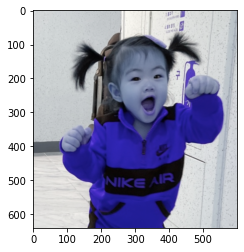

In [9]:
import os
my_image_path = '/content/drive/MyDrive/Data/Mustache/img1.png'
img_bgr = cv2.imread(my_image_path)    #- OpenCV로 이미지를 읽어서
img_bgr = cv2.resize(img_bgr, (600, 640))    # 640x360의 크기로 Resize
img_show = img_bgr.copy()      #- 출력용 이미지 별도 보관
plt.imshow(img_bgr)
plt.show()

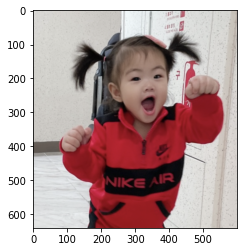

In [10]:
#OpenCV는 BGR(파랑, 녹색, 빨강)을 사용,matplotlib, dlib 등의 이미지 라이브러리는 모두 이미지 채널을 RGB(빨강, 녹색, 파랑) 순으로 사용 - 색 전환
# plt.imshow 이전에 RGB 이미지로 전환
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

In [11]:
import dlib
detector_hog = dlib.get_frontal_face_detector()   #- detector 선언

In [12]:
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1)   #- (image, num of img pyramid)

rectangles[[(253, 150) (408, 305)]]


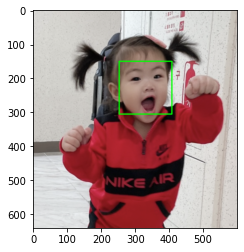

In [18]:
#입벌린 사진
print(dlib_rects)   # 찾은 얼굴영역 좌표

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()